- talk for ~25 ppl + some data scientists from the meet-up
- tech team (web designer/backend) ~18 ppl, marketing team ~7 ppl
- most have experience in coding
- ~30 min for the talk, 40 min max


Ideas:
- integrate with binder for online server
- moving from excel to pandas: pros and cons
- A/B testing dataset as an example
- exploratory visualization with matplotlib + pandas + seaborn
- bokeh + D3 for the embedded visualization -- even for production

# Follow along: 
## bit.ly/caffeina-data-vis

# The speaker

My name is Sergey Antopolskiy. I've studied biology at MSU, Moscow, and neuroscience at SISSA, Trieste. Currently I work as a senior research scientist / data scientist at Camlin Group R&D office in Parma (https://www.camlingroup.com/) where I work with biomedical data.

Contacts: 
- https://github.com/antopolskiy
- s.antopolsky@gmail.com

# Intro to data visualization
- Why we do data vis?
- Why choose Python over alternatives?
- Examples of different libraries
    - Matplotlib
    - Seaborn
    - Bokeh

In [35]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 110

# From presentation to exploration

## Presentation ("Infographics")
- Made for non-experts
- Relies on design
- Form as important as content

https://informationisbeautiful.net/

<img src="https://thumbnails-visually.netdna-ssl.com/infographics--the-benefits-of-their-use-online_565c628147e97.jpg" width=600>

More recently -- interactive visualizations, e.g.: http://informationisbeautiful.net/visualizations/snake-oil-scientific-evidence-for-nutritional-supplements-vizsweet/

## Middle-ground: visualization tools for non-experts and data-driven journalism

Visualization tools for non-experts: https://www.gapminder.org/tools/

Data-driven journalism: https://www.bloomberg.com/graphics/2015-dangerous-jobs/

Difference of these tools with infographics: in the latter only a selected set of results is present to attract viewer's attention, while here the user is given full access to the data and is free to explore on her own

## Exploration

Why not just use descriptive statistics: mean, standard deviation, statistical tests, etc?

In [12]:
anscombe = pd.read_csv('data/anscombe.csv')
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
0,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
1,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
2,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
3,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
4,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
5,14.0,14.0,14.0,8.0,9.96,8.10,8.84,7.04
6,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
7,4.0,4.0,4.0,19.0,4.26,3.10,5.39,12.50
8,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56
9,7.0,7.0,7.0,8.0,4.82,7.26,6.42,7.91


In [13]:
anscombe.mean()

x1    9.000000
x2    9.000000
x3    9.000000
x4    9.000000
y1    7.500909
y2    7.500909
y3    7.500000
y4    7.500909
dtype: float64

In [14]:
anscombe.std()

x1    3.316625
x2    3.316625
x3    3.316625
x4    3.316625
y1    2.031568
y2    2.031657
y3    2.030424
y4    2.030579
dtype: float64

We are visual animals, we notice visual patterns much more easily, e.g. from the recent Russian Presidential elections:

<img src="img/russian-elections-graph.png" width=600>

Note the peaks at the multiples of 5. An image much like this one provoked the massive protests in 2011 after the parlamentary elections.

# Why in Python?

- Free and open source
- Complete programming language
- Many visualization libraries suited for various purposes
- Jupyter notebooks
- Very large community of data scientists and ML engineers

# Visualization tools in Python
We need some data:

In [106]:
births = pd.read_csv('data/births.csv').dropna()
births = births.loc[births.day.notnull()]
births = births.loc[births.births>1000]
births['day'] = pd.to_numeric(births.day)
births['month'] = pd.to_numeric(births.month)
births['year'] = pd.to_numeric(births.year)
print(births.shape)

(14610, 5)


In [107]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [108]:
births.tail()

,year,month,day,gender,births
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435
15066,1988,12,31.0,M,4698


Before we can visualize, we need to transform the data in some way. I do it here with `pandas` library, which deserves a talk of its own. I will not explain how I transform the data (i.e. the code), I will only show what I get in the end. If you're interested, take a look at this repo: https://github.com/jakevdp/PythonDataScienceHandbook

## Matplotlib

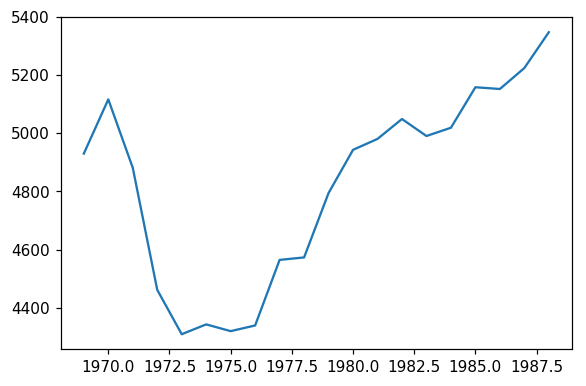

In [109]:
births_per_year = births.groupby('year')['births'].mean()
plt.plot(births_per_year)

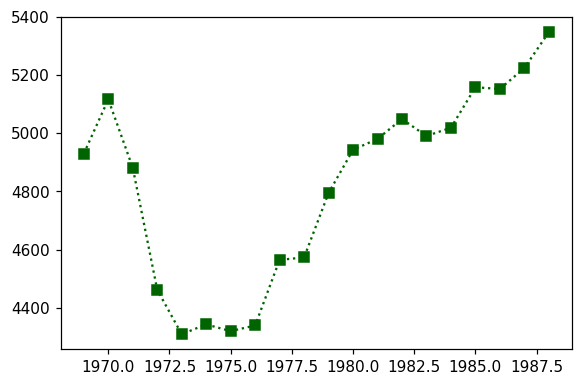

In [110]:
plt.plot(births_per_year, color='darkgreen', marker='s', linestyle=':')

In [111]:
births_per_year_m = births.groupby(['gender','year'])['births'].mean()['M']
births_per_year_f = births.groupby(['gender','year'])['births'].mean()['F']

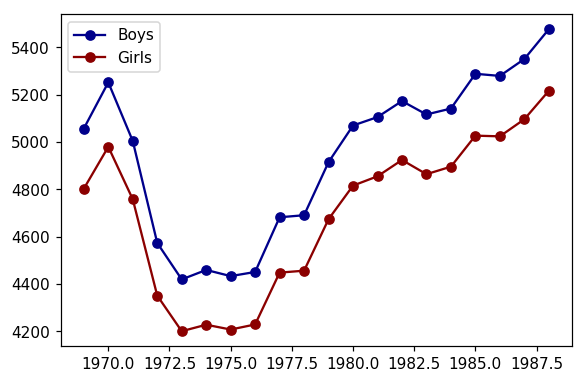

In [112]:
plt.plot(births_per_year_m, color='darkblue', marker='o', label='Boys')
plt.plot(births_per_year_f, color='darkred', marker='o', label='Girls')
plt.legend()

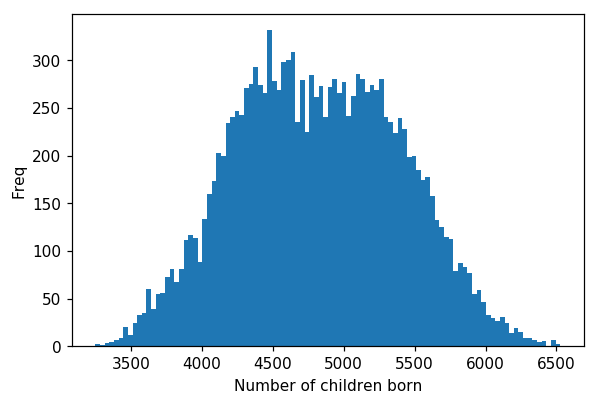

In [113]:
plt.hist(births['births'],bins=100)
plt.xlabel('Number of children born')
plt.ylabel('Freq')
plt.show()

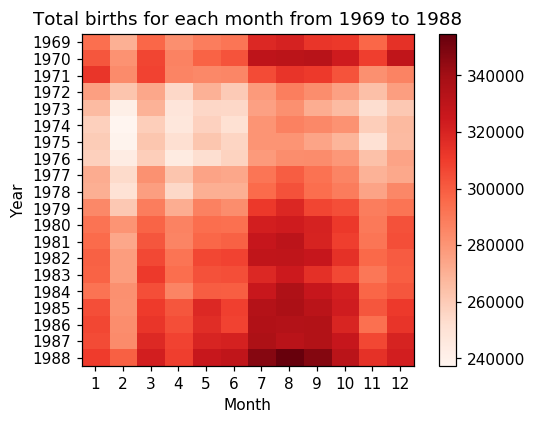

In [120]:
births_year_month = births.pivot_table(index='year',columns='month',values='births',aggfunc=np.sum)

plt.imshow(births_year_month, interpolation=None, cmap='Reds', aspect=0.6)
plt.colorbar()

plt.xticks(range(len(births_year_month.columns)), 
           births_year_month.columns)

plt.yticks(range(len(births_year_month.index)), 
           births_year_month.index)

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Total births for each month from ' + str(births_year_month.index[0]) + 
          ' to ' + str(births_year_month.index[-1]));

<img src="https://d2f99xq7vri1nk.cloudfront.net/DataDino-600x455.gif" width=400>